# Task 6: Decision Tree Classifier
## Author: Noha Ihab

# Introduction
The goal of this task is to build a model that can predict the correct class of Iris implemented on the famous Iris dataset.<br>
The dataset contains four features:
<li>SepalLengthCm: length of sepals in cm</li>
<li>SepalWidthCm: width of sepals in cm</li>
<li>PetalLengthCm: length of petals in cm</li>
<li>PetalWidthCm: width of petals in cm</li>
and the target: Species: contains three classes-> Setosa, Versicolor, or Virginica

# Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn import decomposition
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree

### Import the data into a Pandas dataframe

In [2]:
df=pd.read_csv('Iris.csv')

## Exploring the data

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

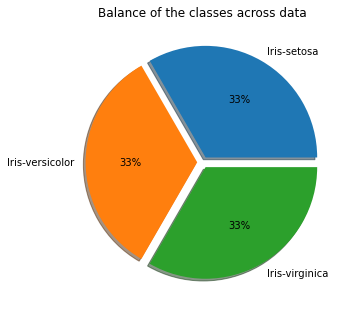

In [5]:
#check out the class distribution
plt.figure(figsize=(5,8))
plt.pie(df['Species'].value_counts(), autopct='%.0f%%', labels = df['Species'].unique(), shadow=True, explode=(0.05,0.05,0.05))
plt.title('Balance of the classes across data', );

### from the plot we conclude that the dataset is indeed balanced

In [6]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [7]:
#check on any null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#view the general numeric characteristics of the features
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


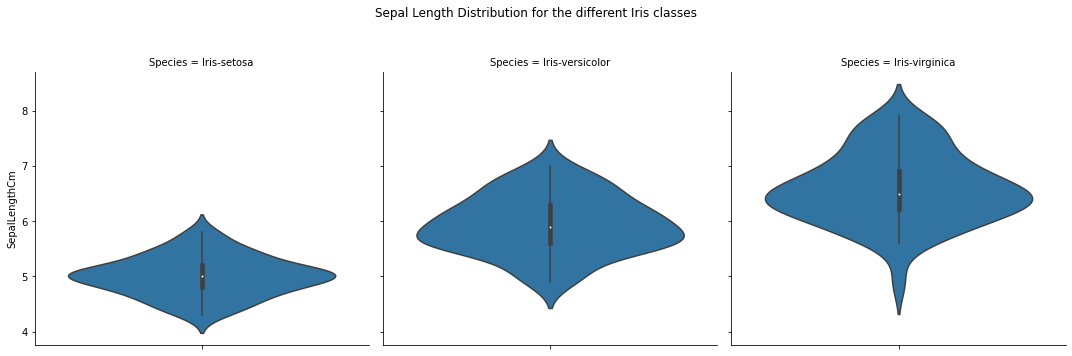

In [9]:
p = sns.catplot(kind='violin', data=df, y='SepalLengthCm', col='Species', col_wrap=3)
p.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
p.fig.suptitle('Sepal Length Distribution for the different Iris classes');

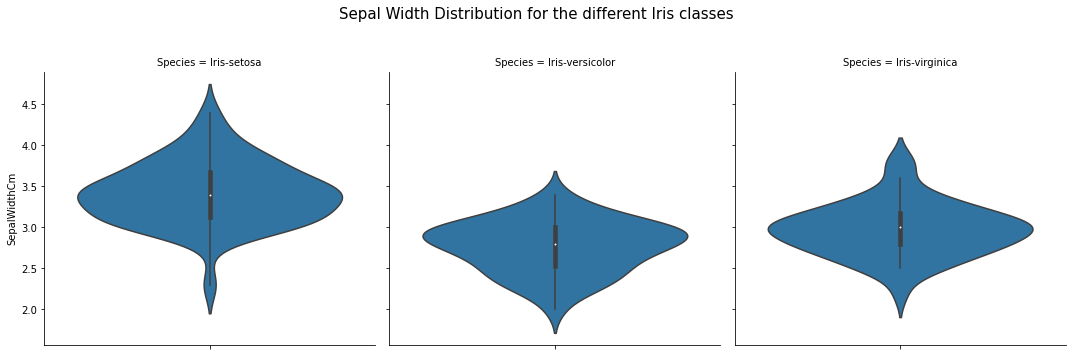

In [10]:
p = sns.catplot(kind='violin', data=df, y='SepalWidthCm', col='Species', col_wrap=3)
p.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
p.fig.suptitle('Sepal Width Distribution for the different Iris classes', fontsize=15);

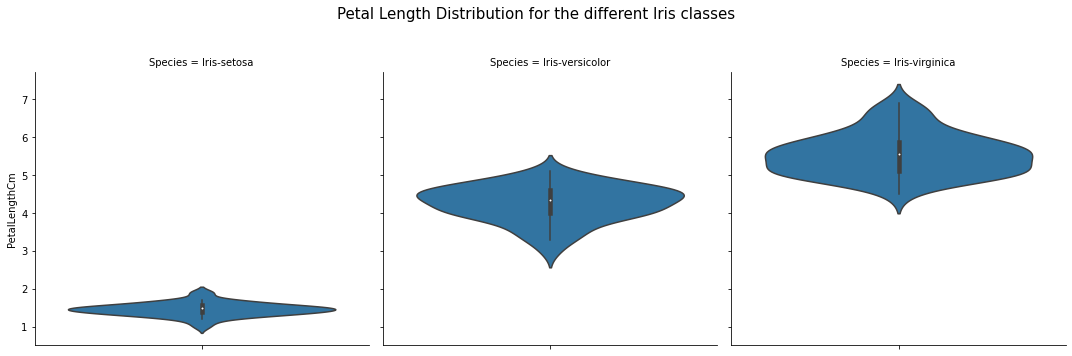

In [11]:
p = sns.catplot(kind='violin', data=df, y='PetalLengthCm', col='Species', col_wrap=3)
p.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
p.fig.suptitle('Petal Length Distribution for the different Iris classes', fontsize=15);

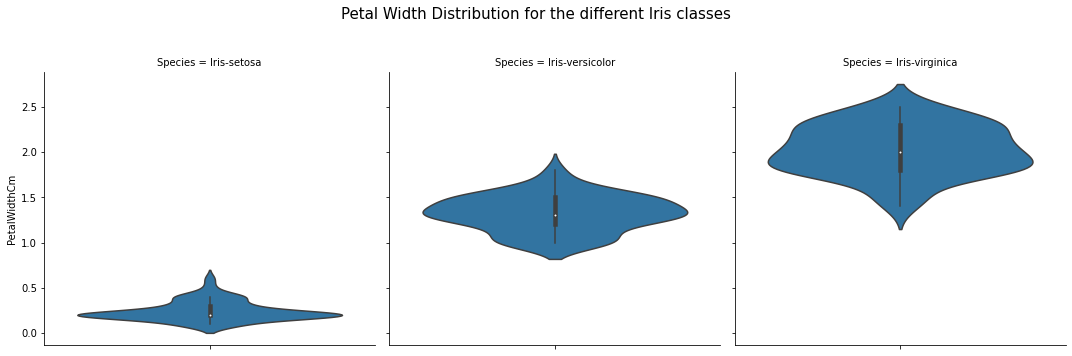

In [12]:
p = sns.catplot(kind='violin', data=df, y='PetalWidthCm', col='Species', col_wrap=3)
p.fig.subplots_adjust(top=0.8)
p.fig.suptitle('Petal Width Distribution for the different Iris classes', fontsize=15);

### From the visualizations, we observe that Iris-Setosa has unique values from the others especially in Petal Width, wheras Versicolor and Virginica have close values. Another observation is that the values are normally distributed for each class.

# Modeling

In [13]:
#divide the data into dependent and independent features
#drop the Id because it's meaningless
X= df.drop(['Species','Id'],axis=1)
y=df['Species']

## Split data into training and testing

In [14]:
#split the data into 70% training 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Create the Model and fit on the training data

In [15]:
clf = DecisionTreeClassifier()

In [16]:
clf = clf.fit(X_train,y_train)

## Predictions and Evaluation of Decision Tree

In [17]:
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


## Visualize the tree

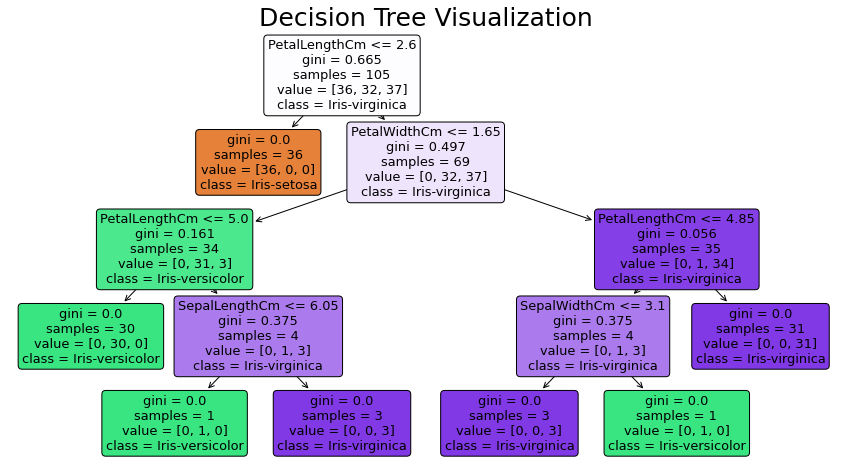

In [18]:
fig = plt.figure(figsize=(15,8))
_ = tree.plot_tree(clf, 
                   feature_names=list(X.columns),  
                   class_names=[str(s) for s in y.unique()],
                   filled=True,
                  rounded=True)
plt.title('Decision Tree Visualization', fontsize=25);

# Model Evaluation

## Plot confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix

matrix  = confusion_matrix(y_test, y_pred)
matrix_df = pd.DataFrame(matrix,index = ['setosa','versicolor','virginica'], columns =['setosa','versicolor','virginica'])

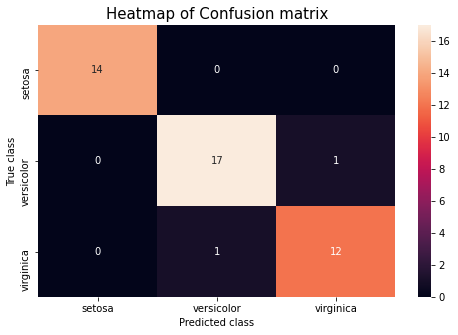

In [20]:
plt.figure(figsize=(8,5))
sns.heatmap(matrix_df,   annot=True)
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Heatmap of Confusion matrix', fontsize=15);

### The heatmap shows that in the test data: setosa class had 100% accuracy, while versicolor and verginica each had one mislabelled observation.

## Plot ROC curves

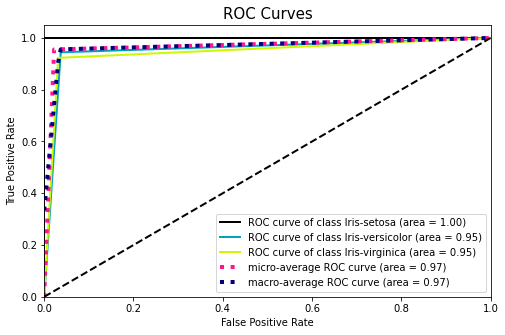

In [21]:
predicted_probas = clf.predict_proba(X_test)

import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas, figsize=(8,5), title_fontsize=15)
plt.show();

### The AUC for the three classes is very close to 1, this concludes that the model has a good measure of seperability. The curves can be used to measure our DecisionTree classifier with other classifiers on the same dataset.